In [62]:
# SVM Model with GridSearchCV Tuning -- reduced features

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# df = pd.read_csv("exoplanet_data.csv")
# claim_accident_param = pd.read_csv("./Resources/claims_accidents.csv")
accident_claim_param = pd.read_csv("./Resources/accident_claimpgsql.csv")
# /Users/amusaadebayo/TEAM_CRASH copy/ML_starter_code_templates/Resources/claims_accidents.csv
# TEAM_CRASH copy/ML_starter_code_templates/claims_selected_features.csv
# Drop the null columns where all values are null
claim_accident_param = accident_claim_param.dropna(axis='columns', how='all')
# Drop the null rows
# df = df.dropna()
accident_claim_param.head()

,age,incident_hour_of_the_day,number_of_vehicles_involved,auto_make,auto_year,state,severity,start_time,end_time,temperature,humidity,visibility,wind_speed,precipitation
0,48,5,1,Saab,2004,NC,2,2019-10-07 17:43:09,2019-10-07 19:42:50,76.0,62.0,10.0,3.0,0.0
1,42,8,1,Mercedes,2007,CA,2,2020-12-13 21:53:00,2020-12-13 22:44:00,51.0,80.0,10.0,6.0,0.0
2,29,7,3,Dodge,2007,NV,2,2018-04-17 16:51:23,2018-04-17 17:50:46,53.6,16.0,10.0,4.6,NaN
3,41,5,1,Chevrolet,2014,FL,3,2016-08-31 17:40:49,2016-08-31 18:10:49,84.2,84.0,10.0,13.8,NaN
4,44,20,1,Accura,2009,NC,3,2018-10-17 16:40:36,2018-10-17 17:10:18,73.4,33.0,10.0,6.9,NaN


In [3]:
accident_claim_param.columns

Index(['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'auto_make', 'auto_year', 'state', 'severity', 'start_time', 'end_time',
       'temperature', 'humidity', 'visibility', 'wind_speed', 'precipitation'],
      dtype='object')

In [4]:
print(accident_claim_param.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          999 non-null    int64  
 1   incident_hour_of_the_day     999 non-null    int64  
 2   number_of_vehicles_involved  999 non-null    int64  
 3   auto_make                    999 non-null    object 
 4   auto_year                    999 non-null    int64  
 5   state                        999 non-null    object 
 6   severity                     999 non-null    int64  
 7   start_time                   999 non-null    object 
 8   end_time                     999 non-null    object 
 9   temperature                  983 non-null    float64
 10  humidity                     983 non-null    float64
 11  visibility                   980 non-null    float64
 12  wind_speed                   903 non-null    float64
 13  precipitation       

In [8]:
accident_claims_training_df = accident_claim_param[['age', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'auto_year', 'severity', 'temperature',	'humidity',	'visibility',	'wind_speed',	'precipitation']].dropna()
# DataFrame with new columns
print(accident_claims_training_df)

     age  incident_hour_of_the_day  number_of_vehicles_involved  auto_year  \
0     48                         5                            1       2004   
1     42                         8                            1       2007   
5     39                        19                            3       2003   
6     34                         0                            3       2012   
8     33                        21                            1       2012   
..   ...                       ...                          ...        ...   
990   43                        18                            1       2013   
993   28                        20                            3       2012   
994   30                         6                            1       1996   
997   34                         4                            3       1996   
998   62                         2                            1       1998   

     severity  temperature  humidity  visibility  wind_speed  p

Select your features (columns)

Create a Train Test Split
Use koi_disposition for the y values

In [20]:
X = accident_claims_training_df
y = accident_claims_training_df['severity']
print(X.shape, y.shape)

(549, 10) (549,)


In [21]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Pre-processing
Scale the data using the MinMaxScaler and perform some feature selection

In [22]:
# Scaling the data
from sklearn.preprocessing import MinMaxScaler
X_minmax = MinMaxScaler().fit(X_train)

X_train_minmax = X_minmax.transform(X_train)
X_test_minmax = X_minmax.transform(X_test)

Training the Model¶

In [23]:
# pport vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(kernel='linear')

# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train_minmax, y_train)

training_score = model.score(X_train_minmax, y_train)
testing_score = model.score(X_test_minmax, y_test)

In [24]:
model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [25]:
print(f"Training Data Score: {training_score}")
print(f"Testing Data Score: {testing_score}")

Training Data Score: 0.9854014598540146
Testing Data Score: 0.9855072463768116


Hyperparameter Tuning
Use GridSearchCV to tune the model's parameters

In [26]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10, 50],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, verbose=3)

In [27]:
# Train the model with GridSearch
# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
grid.fit(X_train_minmax, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0001; total time=   0.0s
[CV 1/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 2/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 3/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 4/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 5/5] END ..............................C=1, gamma=0.0005; total time=   0.0s
[CV 1/5] END ...............................C=1, gamma=0.001; total time=   0.0s
[CV 2/5] END ...............................C=1,

GridSearchCV(estimator=SVC(kernel='linear'),
             param_grid={'C': [1, 5, 10, 50],
                         'gamma': [0.0001, 0.0005, 0.001, 0.005]},
             verbose=3)

In [28]:
# Single best score achieved across all params (k)
print(grid.best_score_)
# Dictionary containing the parameters (k) used to generate that score
print(grid.best_params_)

# Actual model object fit with those best parameters
# Shows default parameters that we did not specify
print(grid.best_estimator_)


1.0
{'C': 5, 'gamma': 0.0001}
SVC(C=5, gamma=0.0001, kernel='linear')


In [29]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test_minmax)

In [30]:
print('Test Acc: %.3f' % grid.score(X_test_minmax, y_test))

Test Acc: 1.000


In [31]:
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test.tolist()}).reset_index(drop=True)
results

,Prediction,Actual
0,2,2
1,2,2
2,2,2
3,2,2
4,3,3
...,...,...
133,2,2
134,2,2
135,2,2
136,2,2


In [32]:
results.head(10)

,Prediction,Actual
0,2,2
1,2,2
2,2,2
3,2,2
4,3,3
5,2,2
6,2,2
7,2,2
8,2,2
9,2,2


In [33]:
results.tail(10)

,Prediction,Actual
128,2,2
129,3,3
130,2,2
131,2,2
132,2,2
133,2,2
134,2,2
135,2,2
136,2,2
137,2,2


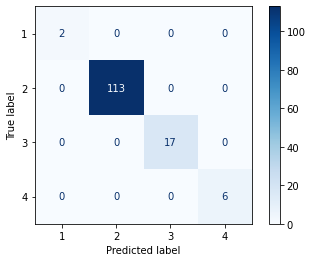

In [34]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(grid, X_test_minmax, y_test, cmap="Blues")
plt.show()

In [35]:
# from sklearn.metrics import target_names=["CAport classification_report
# print(classification_report(y_test, predictions,
#                        "CANDIDATE", "CONFIRMED", "FALSE POSITIVE"]))

Saving the Model

In [36]:
# save model by updating "your_name" with Adebayo
# and "your_model" with your model variable
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'Adebayo_SVM8.sav'
joblib.dump(model, filename)

['Adebayo_SVM8.sav']